In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np

In [2]:
## Lets create synthetic data points
from sklearn.datasets import make_classification

In [3]:
x,y = make_classification(n_classes=2,n_features=2,n_samples=10000,n_redundant=0,n_clusters_per_class=1)

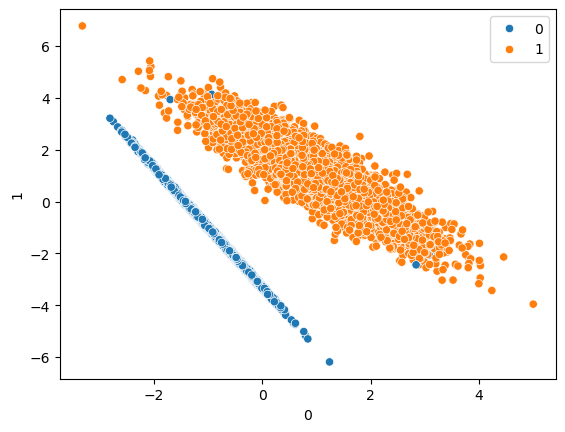

In [4]:
sns.scatterplot(x=pd.DataFrame(x)[0],y=pd.DataFrame(x)[1],hue=y)
plt.show()

In [5]:
from sklearn.svm import SVC

In [6]:
svc = SVC(kernel="linear")

In [7]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=10)

In [8]:
svc.fit(xtrain,ytrain)

SVC(kernel='linear')

In [9]:
## Predictions
ypred = svc.predict(xtest)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(ytest,ypred))
print(confusion_matrix(ytest,ypred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1257
           1       1.00      0.99      1.00      1243

    accuracy                           1.00      2500
   macro avg       1.00      1.00      1.00      2500
weighted avg       1.00      1.00      1.00      2500

[[1254    3]
 [   7 1236]]


In [10]:
rbf =SVC(kernel="rbf")
rbf.fit(xtrain,ytrain)

SVC()

In [11]:
## Predictions
ypred = rbf.predict(xtest)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(ytest,ypred))
print(confusion_matrix(ytest,ypred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1257
           1       1.00      0.99      1.00      1243

    accuracy                           1.00      2500
   macro avg       1.00      1.00      1.00      2500
weighted avg       1.00      1.00      1.00      2500

[[1254    3]
 [   7 1236]]


In [12]:
polynomial =SVC(kernel="poly")
polynomial.fit(xtrain,ytrain)
## Predictions
ypred = polynomial.predict(xtest)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(ytest,ypred))
print(confusion_matrix(ytest,ypred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1257
           1       1.00      0.99      1.00      1243

    accuracy                           1.00      2500
   macro avg       1.00      1.00      1.00      2500
weighted avg       1.00      1.00      1.00      2500

[[1254    3]
 [   7 1236]]


In [13]:
sigmoid =SVC(kernel="sigmoid")
sigmoid.fit(xtrain,ytrain)
## Predictions
ypred = sigmoid.predict(xtest)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(ytest,ypred))
print(confusion_matrix(ytest,ypred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1257
           1       0.96      0.96      0.96      1243

    accuracy                           0.96      2500
   macro avg       0.96      0.96      0.96      2500
weighted avg       0.96      0.96      0.96      2500

[[1209   48]
 [  49 1194]]


In [14]:
## Hyperparameter tuning with SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [15]:

#defining parameter range
params = {
    "C":[0.1,1,10,100,1000],
    "gamma":[1,0.1,0.01,0.001,0.0001],
    "kernel":["rbf","poly","sigmoid","linear"]
}

In [18]:
grid = GridSearchCV(SVC(),refit=True,param_grid=params,cv=2,verbose=3)

In [ ]:
grid.fit(xtrain,ytrain)

Fitting 2 folds for each of 100 candidates, totalling 200 fits
[CV 1/2] END ........C=0.1, gamma=1, kernel=rbf;, score=0.995 total time=   0.0s
[CV 2/2] END ........C=0.1, gamma=1, kernel=rbf;, score=0.994 total time=   0.0s
[CV 1/2] END .......C=0.1, gamma=1, kernel=poly;, score=0.995 total time=   0.0s
[CV 2/2] END .......C=0.1, gamma=1, kernel=poly;, score=0.994 total time=   0.0s
[CV 1/2] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.881 total time=   0.1s
[CV 2/2] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.900 total time=   0.1s
[CV 1/2] END .....C=0.1, gamma=1, kernel=linear;, score=0.995 total time=   0.0s
[CV 2/2] END .....C=0.1, gamma=1, kernel=linear;, score=0.994 total time=   0.0s
[CV 1/2] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.995 total time=   0.0s
[CV 2/2] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.994 total time=   0.0s
[CV 1/2] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.987 total time=   0.1s
[CV 2/2] END .....C=0.1, gamma=0.1, kernel=pol

In [ ]:
grid.best_params_

In [ ]:

ypred = grid.predict(xtest)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(ytest,ypred))
print(confusion_matrix(ytest,ypred))